<a href="https://colab.research.google.com/github/irfixq/Avocado_King/blob/main/Avocado_King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado Price Prediction for Avocado King

## System Configuration

In [1]:
## import packages
import sys 
import numpy as np 
import pandas as pd
pd.set_option('max_rows', 30000)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from google.colab import data_table
%load_ext google.colab.data_table

In [2]:
## Check system and python dependencies version
print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))

Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
NumPy version: 1.19.5
pandas version: 1.1.5
matplotlib version: 3.2.2


There are 2 options to get the data, either from GitHub or Google Drive.
In this case, I prefer to use Git Clone since it will be easier for user to access the repo instead of loading everything into their Google Drive or local.

In [3]:
## Clone repo from GitHub
! git clone 'https://github.com/irfixq/Avocado_King'

Cloning into 'Avocado_King'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 133 (delta 0), reused 0 (delta 0), pack-reused 130
Receiving objects: 100% (133/133), 9.22 MiB | 24.46 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [4]:
## Mount Google Drive to get data
## make sure you uploaded the folder into your Google Drive first

#from google.colab import drive 
#drive.mount('/content/drive')

In [5]:
## get working directory
! pwd

## list all folders in working directory
! ls

/content
Avocado_King  sample_data


In [6]:
## change working directory to github folder
import os
os.chdir('/content/Avocado_King')

In [7]:
## check working directory after change path
! pwd
! ls

/content/Avocado_King
Avocado_King.ipynb  feature-explanations.xlsx  price-and-sales-data.csv
df_price.csv	    google-data.csv	       README.md


## Data Pre-Processing

1. Data pre-processing steps:
> * Convert dataset into dataframe
> * Check for df dimension (rows, columns)
> * Check for column names and datatype
> * Check for missing values
> * Handle missing values by using mean values (if any)
> * Check for outliers
> * Check for duplicate values
> * Generate new cleaned dataset

2. Features Exploration

3. Features Engineering

### Dataset: Price and Sales Data

In [8]:
## see the shape of the dataset (rows, columns)
df_price = pd.read_csv('/content/Avocado_King/price-and-sales-data.csv')
df_price.shape

(25161, 13)

##### Check column names

In [9]:
## list all column names
df_price.columns

Index(['Date', 'AveragePrice', 'TotalVolume', '4046', '4225', '4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region'],
      dtype='object')

##### Check datatype

In [10]:
## checking data type of each column
df_price.dtypes

Date             object
AveragePrice    float64
TotalVolume     float64
4046            float64
4225            float64
4770            float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object

In [11]:
# convert 'Date' column into datetime format
df_price['Date']=pd.to_datetime(df_price['Date'])

# extract month from 'Date' column
df_price['month']=df_price['Date'].apply(lambda x:x.month)

##### Check for missing values

In [12]:
## check for missing values in dataset
print(f"Missing data:{df_price.isna().sum(axis=0).any()}") # TRUE represents the dataset has missing data

Missing data:True


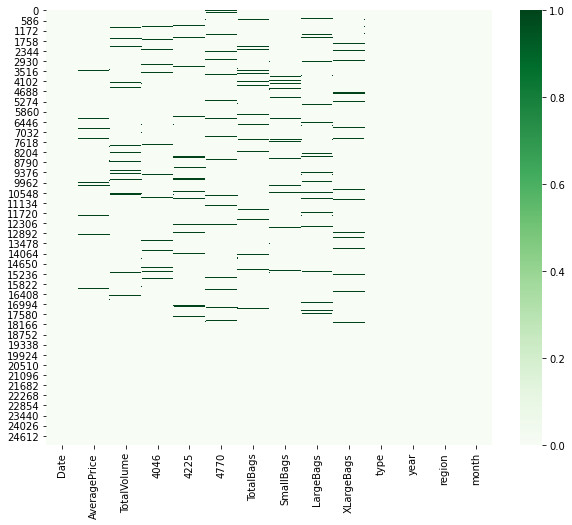

In [13]:
## see distribution of missing values in heat map
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(df_price.isna(),cmap='Greens')

plt.savefig('out_heatmap_missing_values.png', dpi=300, bbox_inches='tight')

Based on heatmap above, 
the dark marks represent missing values in our dataset. Column 'Date', 'type', 'year', 'region' does not have any missing values.

##### Handle missing values

In [15]:
## there are 2 option to handle missing data
# option 1 = eliminate data point that contain missing values (not recommended as you might missed important data for other attribute)
# option 2 = substitue missing value with avg value of the attribute

df_price = df_price.round(2).fillna(df_price.mean())
df_price.head(20)

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1
2,2015-01-04,1.40,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,BaltimoreWashington,1
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise,1
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston,1
5,2015-01-04,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.00,conventional,2015,BuffaloRochester,1
6,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California,1
7,2015-01-04,1.19,166006.29,29419.03,47220.75,38568.95,50797.56,212419.88,75899.24,0.00,conventional,2015,Charlotte,1
8,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago,1
9,2015-01-04,0.88,228569.58,3274.30,168764.78,1447.06,295043.21,17525.31,37445.46,112.67,conventional,2015,CincinnatiDayton,1


In [16]:
## check for dataset after impute missing values
print(f"Missing data:{df_price.isna().sum(axis=0).any()}")  # FALSE represent there is no missing values anymore in the dataset

Missing data:False


##### Check for outliers

In [17]:
## Check for outliers
outliers = df_price.describe()
outliers.round(2)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year,month
count,25161.00,25161.00,25161.00,25161.00,25161.00,25161.00,25161.00,25161.00,25161.00,25161.00,25161.00
mean,1.40,917091.34,298153.02,295828.43,22463.62,295043.21,212419.88,75899.24,4405.64,2016.78,6.11
std,0.38,3660879.24,1265326.52,1187469.40,102739.19,1210963.83,853016.33,351794.36,25357.44,1.32,3.36
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00,1.00
25%,1.12,14000.96,922.36,3284.48,0.00,7733.60,5244.73,288.89,0.00,2016.00,3.00
50%,1.38,136331.51,12258.26,30936.55,252.00,51050.29,35372.69,4757.53,0.00,2017.00,6.00
75%,1.62,563852.38,135882.54,192105.68,8008.86,163240.86,115912.30,37441.30,593.80,2018.00,9.00
max,3.25,63716144.15,22743616.17,20470572.61,2546439.11,23472988.69,15436246.72,7864297.23,844929.83,2019.00,12.00


Based on above table, there is no outliers within the dataset because all mean values lie in between min and max values of the distribution.


##### Check for duplicate values

In [18]:
## Check for duplicate values in dataset
print('Duplicated values = ',sum(df_price.duplicated()))

Duplicated values =  0


In [19]:
## Checking each features of the cleaned dataset
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          25161 non-null  datetime64[ns]
 1   AveragePrice  25161 non-null  float64       
 2   TotalVolume   25161 non-null  float64       
 3   4046          25161 non-null  float64       
 4   4225          25161 non-null  float64       
 5   4770          25161 non-null  float64       
 6   TotalBags     25161 non-null  float64       
 7   SmallBags     25161 non-null  float64       
 8   LargeBags     25161 non-null  float64       
 9   XLargeBags    25161 non-null  float64       
 10  type          25161 non-null  object        
 11  year          25161 non-null  int64         
 12  region        25161 non-null  object        
 13  month         25161 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 2.7+ MB


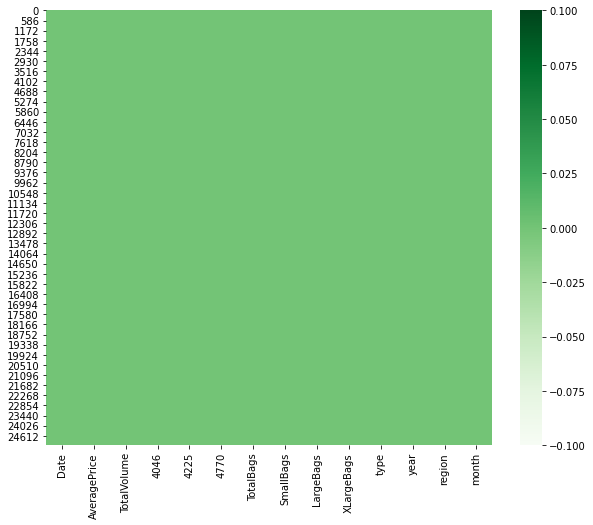

In [20]:
## see distribution of cleaned dataset in heat map
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(df_price.isna(),cmap='Greens')

plt.savefig('out_heatmap_no_missing_values.png', dpi=300, bbox_inches='tight')

In [21]:
## save cleaned dataset as .csv file
df_price.to_csv('df_price.csv',sep=',')

##### **Conclusions**
* Columns = 13
* Rows = 25,161
* No null values after imputing the missing values with mean of the attribute itself
* No outliers
* No duplicate values
* Features with datatype = 'object' could be the machine learning classifier which are; 'Date','type' & 'region' (we will see more)

### Dataset: Google Search

In [22]:
# load dataset
df_google = pd.read_csv('/content/Avocado_King/google-data.csv')
df_google.shape

(239, 7)

In [23]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Week                               239 non-null    object
 1   avocado: (United States)           239 non-null    int64 
 2   organic: (United States)           239 non-null    int64 
 3   avocado recipe: (United States)    239 non-null    int64 
 4   avocado toast: (United States)     239 non-null    int64 
 5   avocado sandwich: (United States)  239 non-null    int64 
 6   organic avocado: (United States)   239 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.2+ KB


In [24]:
# convert 'week' column into datetime format
df_google['Week']=pd.to_datetime(df_google['Week'])

# extract year from 'Date' column
df_google['year']=df_google['Week'].apply(lambda x:x.year)

# extract month from 'Date' column
df_google['month']=df_google['Week'].apply(lambda x:x.month)

# extract day from 'Date' column
df_google['day']=df_google['Week'].apply(lambda x:x.day)

In [25]:
# rename columns to be more meaningful
df_google.columns=['Date','avocado','organic','avocado_recipe','avocado_toast','avocado_sandwich','organic_avocado','year','month','day']

In [31]:
print(f"Missing data:{df_google.isna().sum(axis=0).any()}") 

Missing data:False


In [32]:
print('Duplicated values = ',sum(df_google.duplicated()))

Duplicated values =  0


In [26]:
df_google.head(20)

,Date,avocado,organic,avocado_recipe,avocado_toast,avocado_sandwich,organic_avocado,year,month,day
0,2015-01-04,46,76,84,8,51,10,2015,1,4
1,2015-01-11,48,79,76,8,38,29,2015,1,11
2,2015-01-18,48,82,84,9,66,27,2015,1,18
3,2015-01-25,49,82,89,8,44,28,2015,1,25
4,2015-02-01,52,81,82,7,46,42,2015,2,1
5,2015-02-08,41,80,67,8,60,40,2015,2,8
6,2015-02-15,40,80,61,7,48,17,2015,2,15
7,2015-02-22,41,82,55,8,50,23,2015,2,22
8,2015-03-01,44,83,72,9,38,26,2015,3,1
9,2015-03-08,41,80,66,7,47,31,2015,3,8


In [27]:
## save cleaned dataset as .csv file
df_google.to_csv('df_google.csv',sep=',')

#### Distributions

Text(0.5, 1.0, 'Google Search distribution by year')

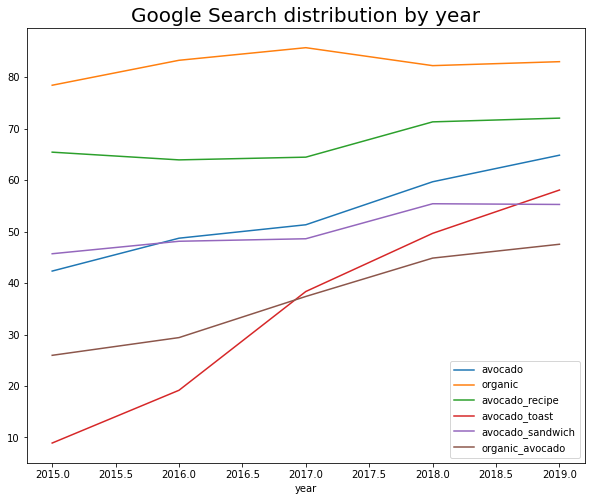

In [28]:
group_year=df_google.groupby('year').mean()

plt.figure(figsize=(10,8))

group_year['avocado'].plot()
group_year['organic'].plot()
group_year['avocado_recipe'].plot()
group_year['avocado_toast'].plot()
group_year['avocado_sandwich'].plot()
group_year['organic_avocado'].plot()
plt.legend(loc="bottom right")
plt.title('Google Search distribution by year',size=20)

Text(0.5, 1.0, 'Google Search distribution by month')

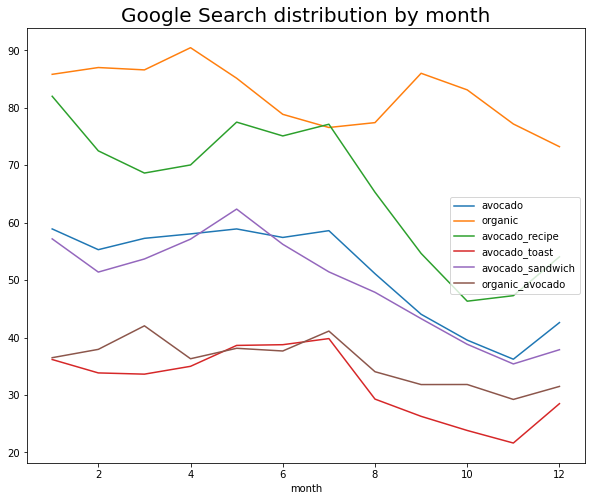

In [29]:
group_month=df_google.groupby('month').mean()

plt.figure(figsize=(10,8))

group_month['avocado'].plot()
group_month['organic'].plot()
group_month['avocado_recipe'].plot()
group_month['avocado_toast'].plot()
group_month['avocado_sandwich'].plot()
group_month['organic_avocado'].plot()
plt.legend(loc="bottom right")
plt.title('Google Search distribution by month',size=20)

**Conclusions**
* Google search based on avocado shown increase trending throughout the year (2015-2019).
* People Google more on 'organic' and 'avocado recipe'.
* Demand in searching has reduced moving towards end of year.

### Features Exploration
To understand how the variables are distributed. 

#### Data Distribution

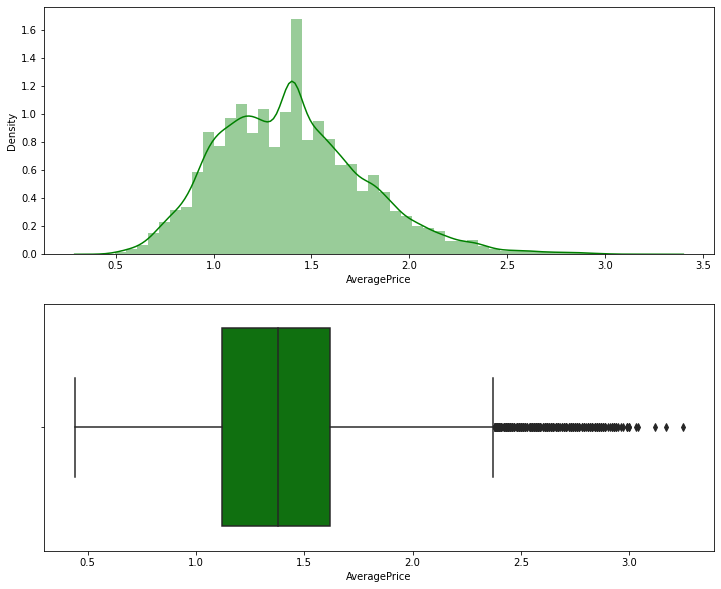

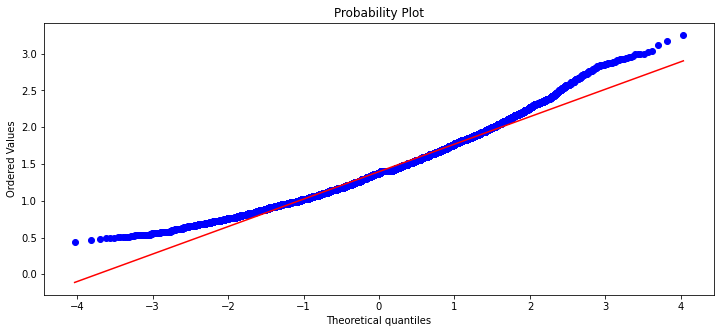

In [33]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
# Univriate distribution plot
# by default the kernel density estimation is TRUE; to see continuous density by smoothing the observation using Gaussian kernel fx
sns.distplot(df_price.AveragePrice, color='green', ax=ax[0])
# Box plot
sns.boxplot(df_price.AveragePrice, color='green',ax=ax[1])

## see probability distribution of avg price
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
# Probability distribution
stats.probplot(df_price['AveragePrice'], plot=ax)
plt.show()

**Conclusions from visualizing the data distribution**

* All 3 plots above showed bimodal distribution which telling us that we have 2 local maximum.
* As discussed earlier, our potential classifier from categorical data could be 'Date', 'type' and 'region'. We can omit date as we already have 'year' column.
* There are 2 distinct values of 'type' and 54 distinct values of 'region'.

In [34]:
print("Number of distinct type   = ", len(df_price.type.unique()))
print("Number of distinct region = ", len(df_price.region.unique()))

Number of distinct type   =  2
Number of distinct region =  54


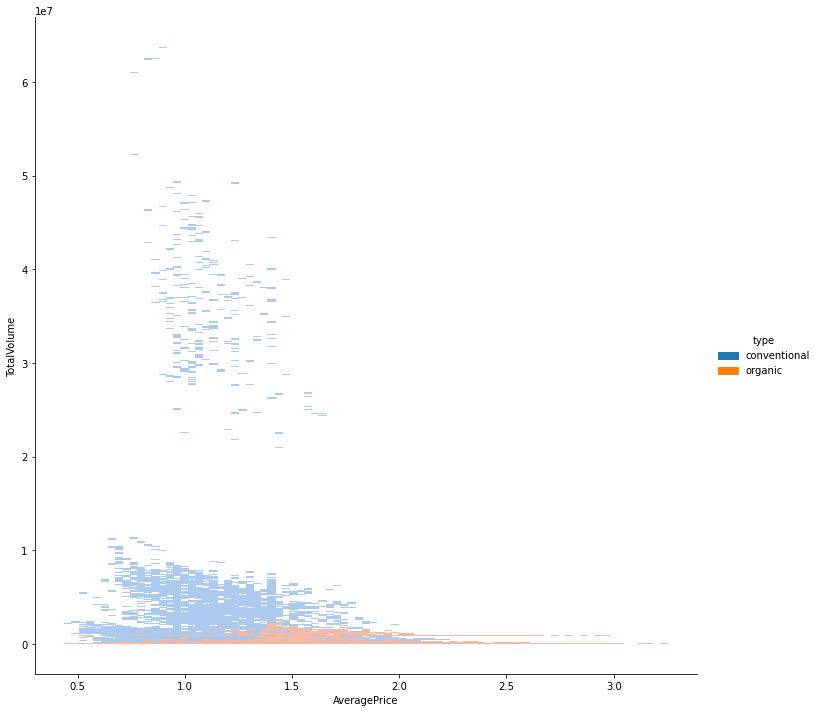

In [35]:
# Bivariate distribution plot of average price against total volume for each avocade type (class: Organic & Conventional)
sns.displot(df_price, x='AveragePrice', y='TotalVolume',hue='type',height=10)

plt.savefig('out_avgprice_totalvol.png', dpi=300, bbox_inches='tight')

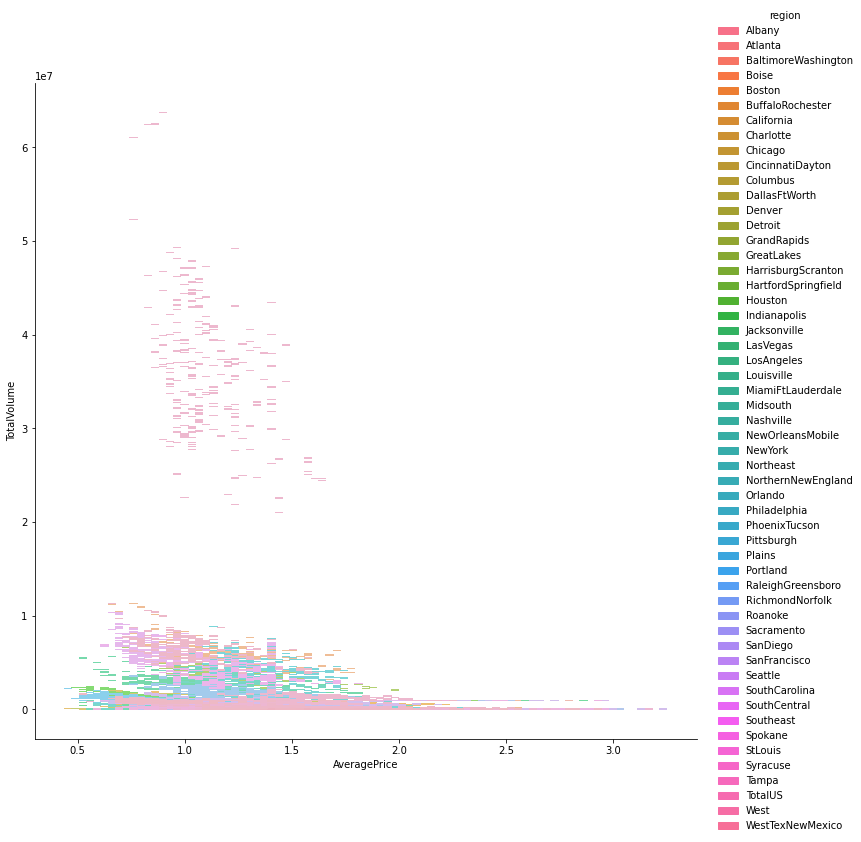

In [36]:
# Bivariate distribution plot of average price against total volume for all region
sns.displot(df_price, x='AveragePrice', y='TotalVolume',hue='region',height=10)
plt.savefig('out_avgprice_totalvol_region.png', dpi=300, bbox_inches='tight')

**Conclusions from Bivariate Distribution plot**

* Based on the bivariate distribution plot above, we can see that more conventional avocado has been sold compared to organic avocado.
* Organic avocado was selling at higher price compared to conventional avocado.
* It is better to get dataset about states so that it can be group into region (East, West, South, North) for easier classification.
* class = 'type' seems to have better distribution than class = 'region'. Next, we will see the exact distribution in feature selection.

#### Descriptive Statistics
* Skewness
* Kurtosis

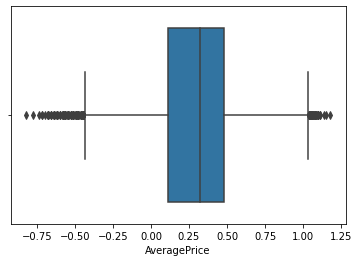

In [37]:
sns.boxplot(np.log(df_price['AveragePrice']))

**Skewness**
* Measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry).
* If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data.
* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [38]:
print("Skewness: %f" % df_price['AveragePrice'].skew())

Skewness: 0.601075


In [39]:
df_price.AveragePrice.describe()

count    25161.000000
mean         1.396161
std          0.377522
min          0.440000
25%          1.120000
50%          1.380000
75%          1.620000
max          3.250000
Name: AveragePrice, dtype: float64

Our dataset distribution is moderately skewed since it is close to 0.5. We dont have to do normalization because the distribution does not show spike or distinct jump (from 0 to 1 to 3).

**Kurtosis**
* Measure the heaviness of distribution tails w.r.t. skewness.
* Positive Kurtosis value means more data in the tail of the distribution.
* Excess kurtosis = kurtosis - 3 = -2.442; which represent that we have lighter tail than normal distribution.

In [40]:
print("Kurtosis: %f" % df_price['AveragePrice'].kurt())

Kurtosis: 0.557160


#### Correlation Matrix

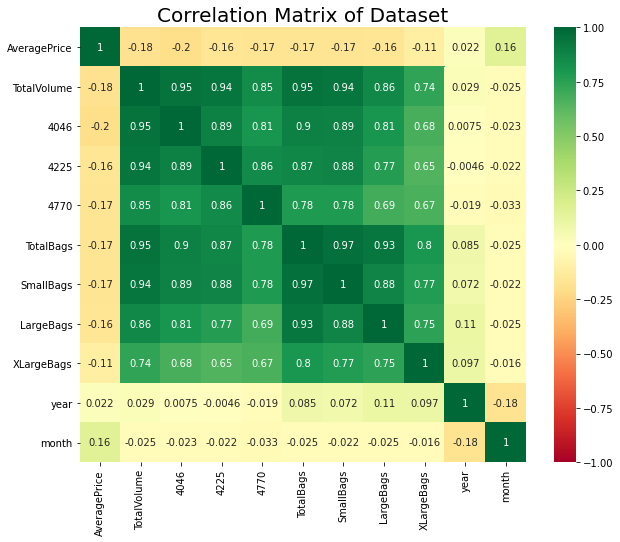

In [41]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.set_title("Correlation Matrix of Dataset", fontsize=20)
sns.heatmap(df_price.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)
plt.savefig('out_corr_mat_1.png', dpi=300, bbox_inches='tight')

#### Density Plot

In [42]:
# Scatter and density plots
def ScatMat(df_price, plotSize, textSize):
    df_price = df_price.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df_price = df_price.dropna('columns')
    df_price = df_price[[col for col in df_price if df_price[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df_price)
    
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df_price = df_price[columnNames]
    ax = pd.plotting.scatter_matrix(df_price, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df_price.corr().values

    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Density Plot of Dataset')
    plt.show()

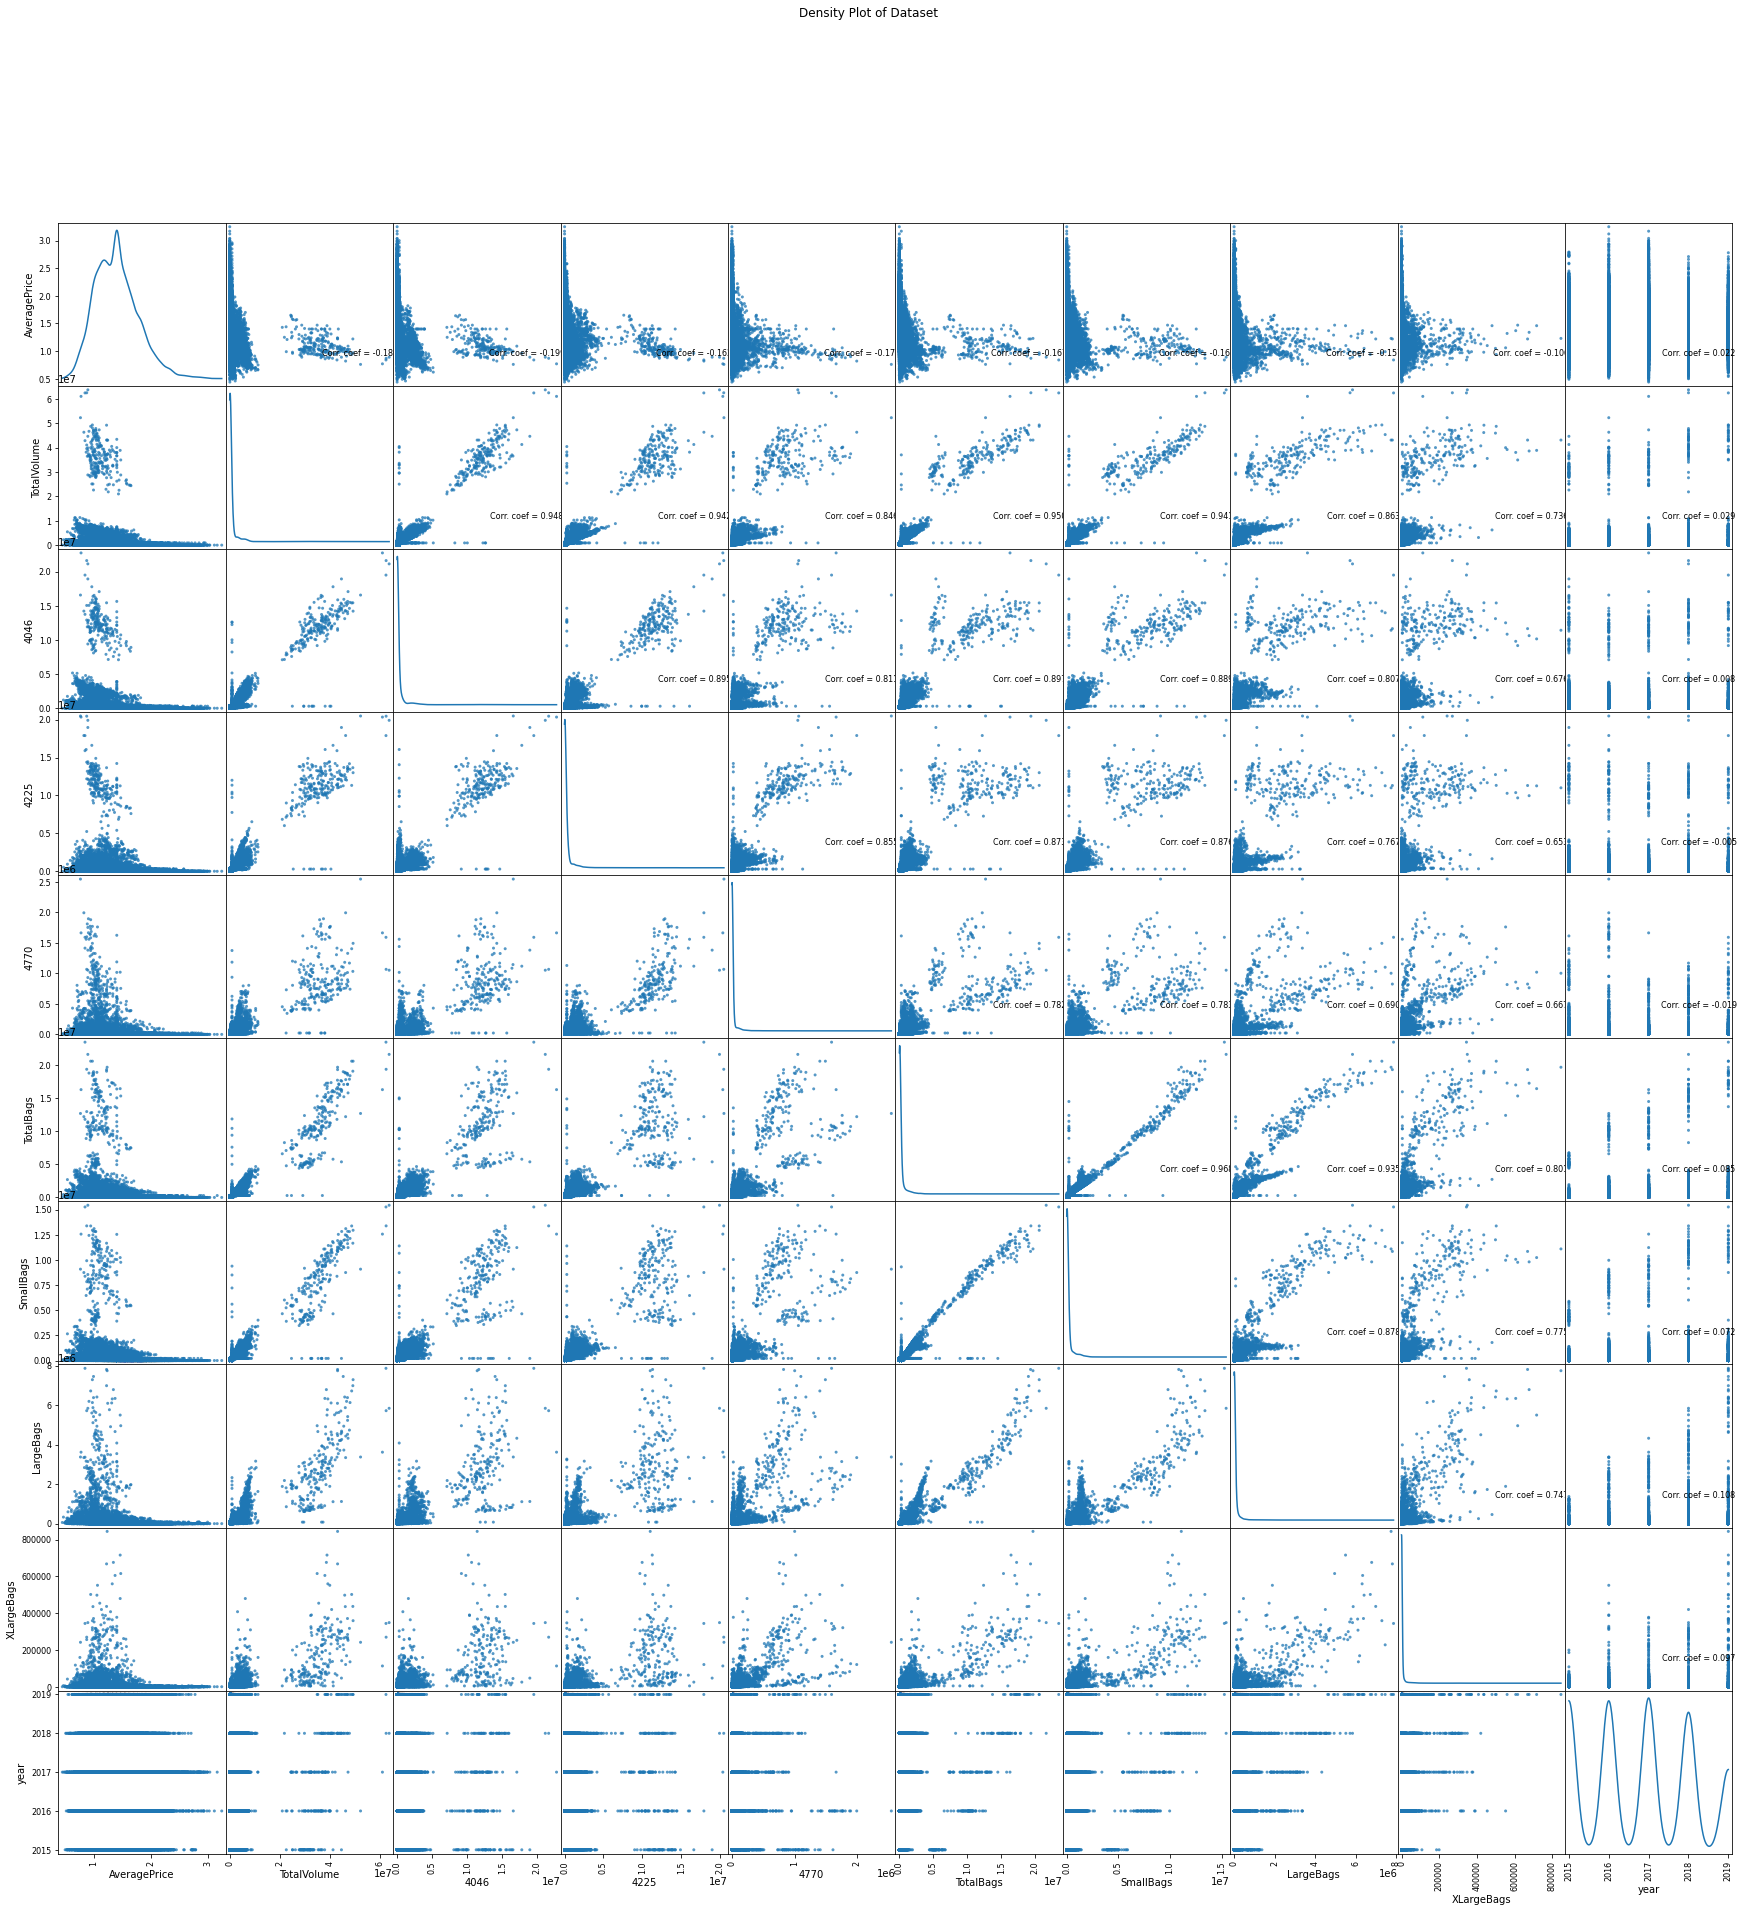

In [43]:
ScatMat(df_price,30,8)

#### **Conclusions**

* Distribution of AveragePrice is moderately skewed.
* We have more data of AveragePrice in the distribution tail.
* Correlation matrix showed all features are not correlated well with the AveragePrice, but they are correlated with each other instead.
* We need to do some feature engineering to solve this problem. Let's see next.

### Features Engineering

In [44]:
df_price.head(50)

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1
2,2015-01-04,1.40,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,BaltimoreWashington,1
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise,1
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston,1
5,2015-01-04,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.00,conventional,2015,BuffaloRochester,1
6,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California,1
7,2015-01-04,1.19,166006.29,29419.03,47220.75,38568.95,50797.56,212419.88,75899.24,0.00,conventional,2015,Charlotte,1
8,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago,1
9,2015-01-04,0.88,228569.58,3274.30,168764.78,1447.06,295043.21,17525.31,37445.46,112.67,conventional,2015,CincinnatiDayton,1


#### Class: 'type'


In [45]:
## check on unique value of feature with datatype = object
df_price.type.unique()

array(['conventional', 'organic'], dtype=object)

Conventional Avocado =  (12582, 14)
Organic Avocado =  (12579, 14)



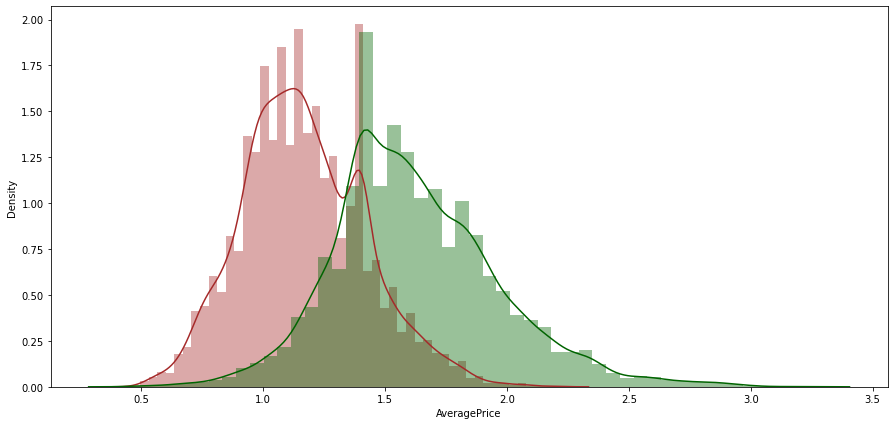

In [46]:
df_conventional = df_price[df_price['type'] == 'conventional']
print("Conventional Avocado = ",df_conventional.shape)

df_organic = df_price[df_price['type'] == 'organic']
print("Organic Avocado = ",df_organic.shape)

print("")
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
sns.distplot(df_conventional['AveragePrice'],color='brown') # conventional avocado
sns.distplot(df_organic['AveragePrice'],color='darkgreen') # organic avocado
plt.show()

Based on class 'type' it shows that the dataset is a balanced dataset. So, it is proven that it is suitable to be as classifier.

In [47]:
## check for normality for AveragePrice of the CONVENTIONAL avocado dataset
df_conventional['AveragePrice'].describe()

count    12582.000000
mean         1.167904
std          0.252983
min          0.460000
25%          0.990000
50%          1.150000
75%          1.340000
max          2.220000
Name: AveragePrice, dtype: float64

In [48]:
## check for normality for AveragePrice of the ORGANIC avocado dataset
df_organic['AveragePrice'].describe()

count    12579.000000
mean         1.624472
std          0.341801
min          0.440000
25%          1.400000
50%          1.580000
75%          1.820000
max          3.250000
Name: AveragePrice, dtype: float64

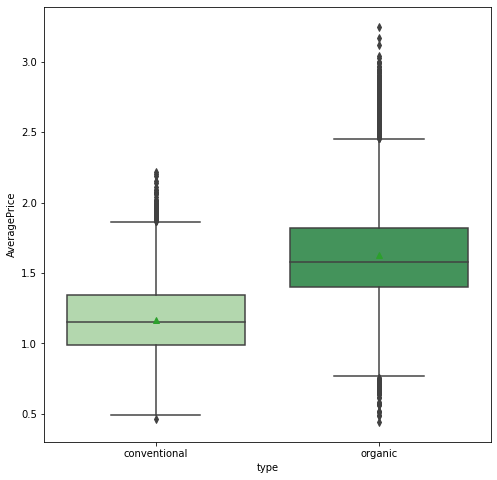

In [49]:
## visualize the normality data in boxplot
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
sns.boxplot(x='type',y='AveragePrice',data=df_price,palette='Greens',showmeans=True)
plt.show()

#### Class: 'region'


In [50]:
## check on unique value of feature with datatype = object
df_price.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

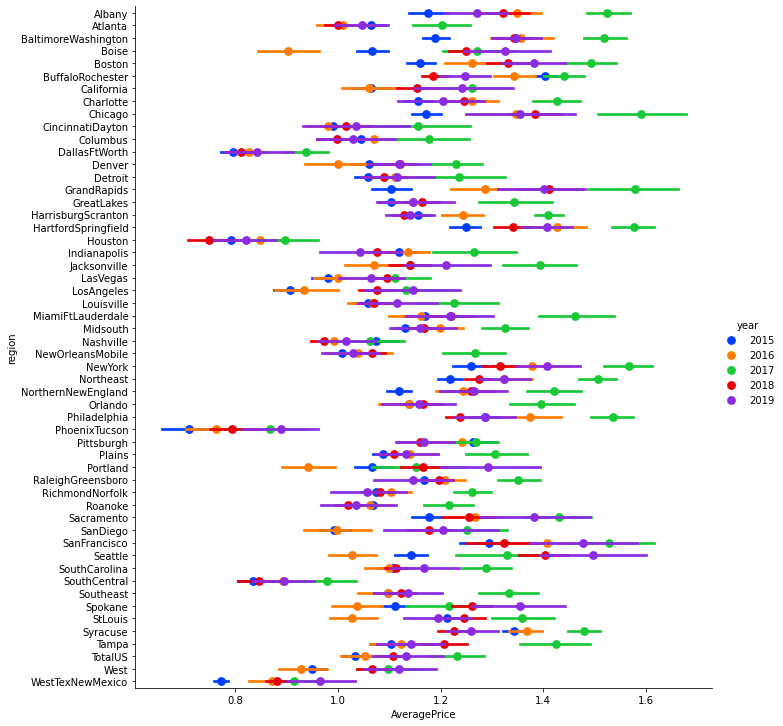

In [51]:
## Average price of CONVENTIONAL avocado in each year by region
conventional = df_price['type']=='conventional'
conv_price_byyear_byregion = sns.factorplot('AveragePrice','region',data=df_price[conventional],hue='year',size=10,palette='bright',join=False)

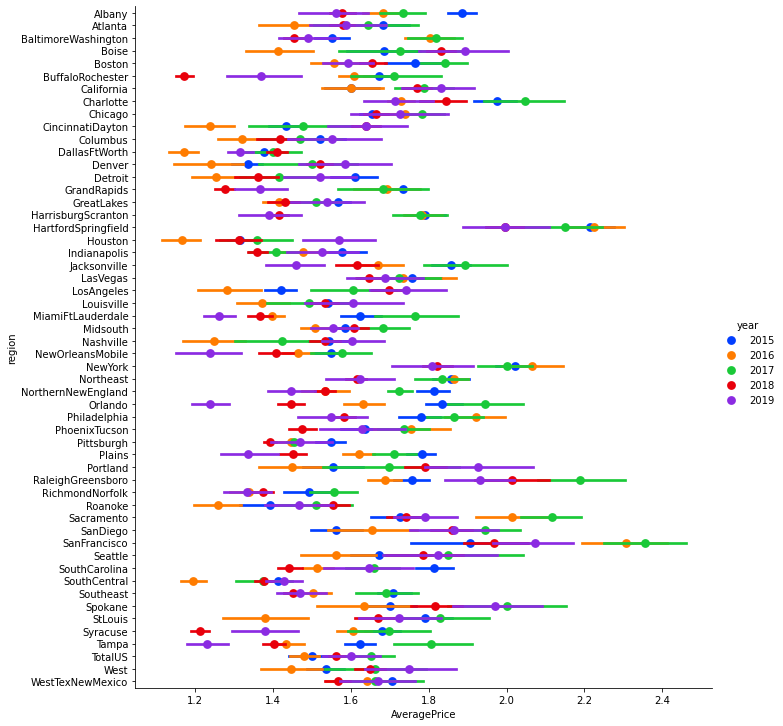

In [52]:
## Average price of ORGANIC avocado in each year by region
organic = df_price['type']=='organic'
organic_price_byyear_byregion = sns.factorplot('AveragePrice','region',data=df_price[organic],hue='year',size=10,palette='bright',join=False)

Text(0.5, 1.0, 'AveragePrice of conventional avocado by region')

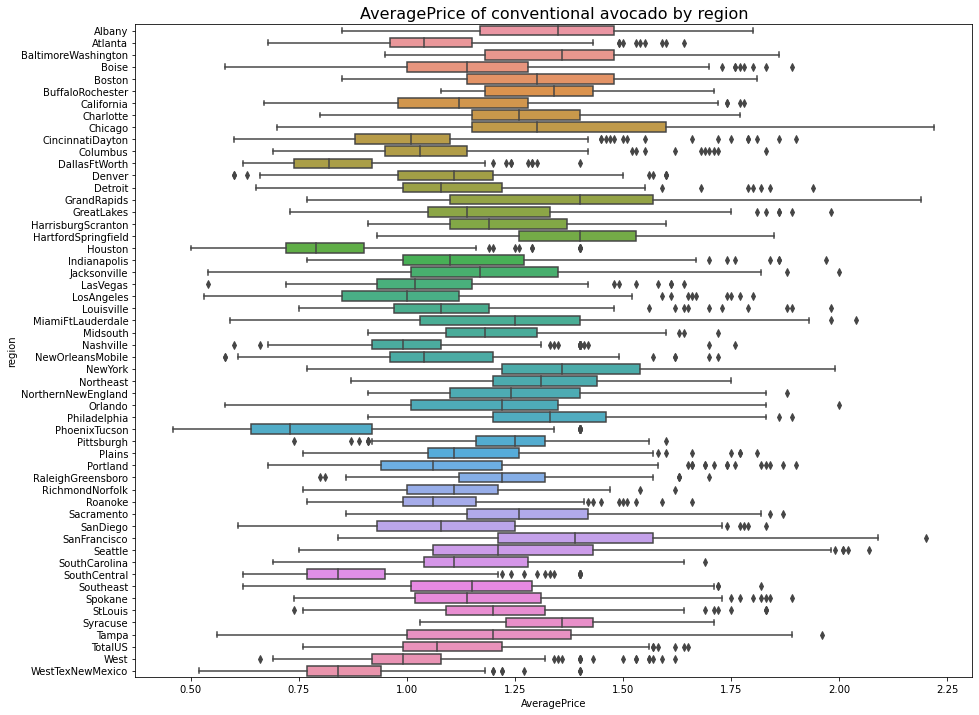

In [53]:
## Average price of conventional avocado by region (average from year 2015-2019)
plt.figure(figsize = (15, 12))
ax = sns.boxplot(y = 'region', x = 'AveragePrice', data = df_price[conventional])
plt.title('AveragePrice of conventional avocado by region', fontsize = 16)

Text(0.5, 1.0, 'AveragePrice of organic avocado by region')

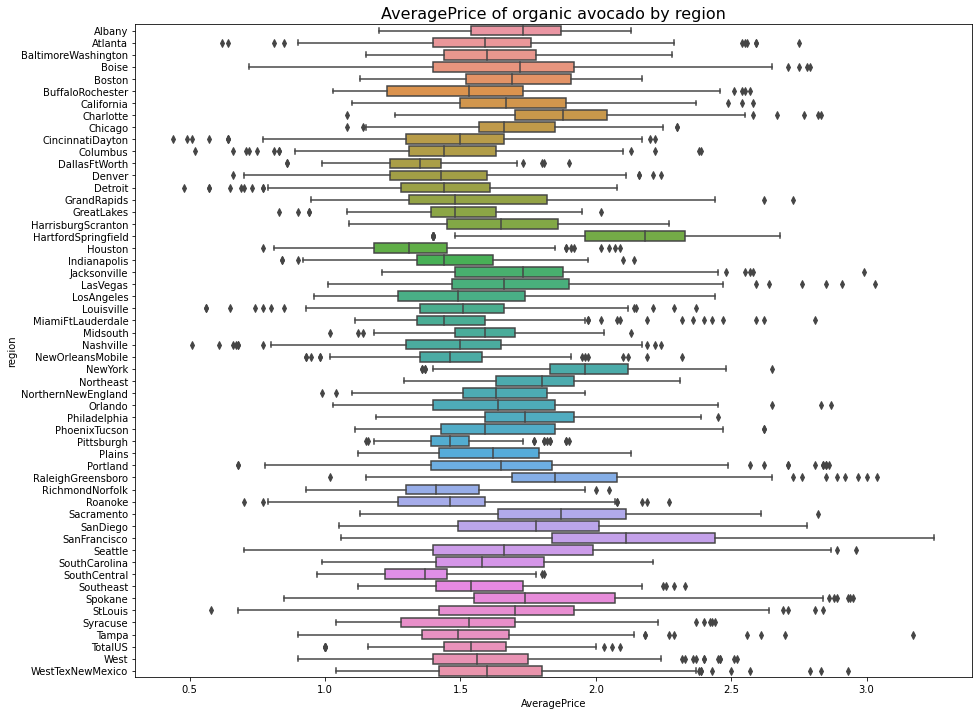

In [54]:
## Average price of organic avocado by region (average from year 2015-2019)
plt.figure(figsize = (15, 12))
ax = sns.boxplot(y = 'region', x = 'AveragePrice', data = df_price[organic])
plt.title('AveragePrice of organic avocado by region', fontsize = 16)

#### Label Encoding
Label Encoding 'type' and 'region' column to convert to numerical data.


In [55]:
from sklearn import preprocessing as pp
le = pp.LabelEncoder()

df_clean_type = df_price ## reassign as new df before encode

df_clean_type['type'] = le.fit_transform(df_clean_type['type'])  # 0=conventional , 1=organic

df_clean_type.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,Albany,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,Atlanta,1
2,2015-01-04,1.40,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,2015,BaltimoreWashington,1
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,Boise,1
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,Boston,1


In [56]:
df_clean_type.type.unique()

array([0, 1])

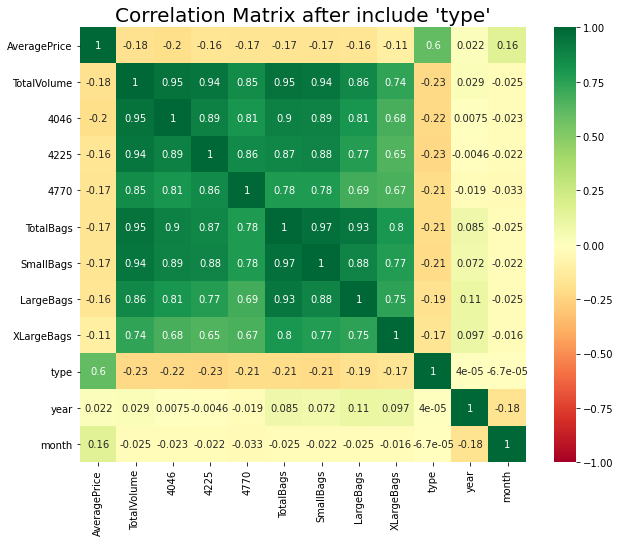

In [57]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.set_title("Correlation Matrix after include 'type'", fontsize=20)
sns.heatmap(df_clean_type.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)

'type' and 'year' shows improved correlation with AveragePrice. Lets see for 'region'.

In [58]:
df_clean_type.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [59]:
df_clean_region = df_clean_type ## reassign as new df before encode

df_clean_region['region'] = le.fit_transform(df_clean_region['region'])  # it will automatically assign from 0 to 53 in alphabetical order

df_clean_region.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,0,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1,1
2,2015-01-04,1.40,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,2015,2,1
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,3,1
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,4,1


In [60]:
df_clean_region.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

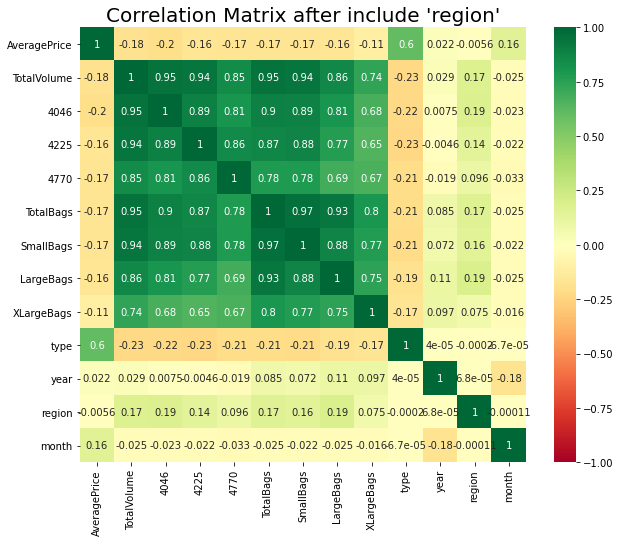

In [61]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.set_title("Correlation Matrix after include 'region'", fontsize=20)
sns.heatmap(df_clean_region.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)

'region' shows weak correlation with AveragePrice but instead shows good correlation with other features. Hence, we can drop this column (providing if the analysis does not predicting by region or we can figure out better way to treat group the region.

In [62]:
df_clean_region = df_clean_region.drop('region',1)

In [63]:
## save new clean dataset as .csv file
df_clean = df_clean_region
df_clean.to_csv('df_clean.csv',sep=',')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          25161 non-null  datetime64[ns]
 1   AveragePrice  25161 non-null  float64       
 2   TotalVolume   25161 non-null  float64       
 3   4046          25161 non-null  float64       
 4   4225          25161 non-null  float64       
 5   4770          25161 non-null  float64       
 6   TotalBags     25161 non-null  float64       
 7   SmallBags     25161 non-null  float64       
 8   LargeBags     25161 non-null  float64       
 9   XLargeBags    25161 non-null  float64       
 10  type          25161 non-null  int64         
 11  year          25161 non-null  int64         
 12  month         25161 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 2.5 MB


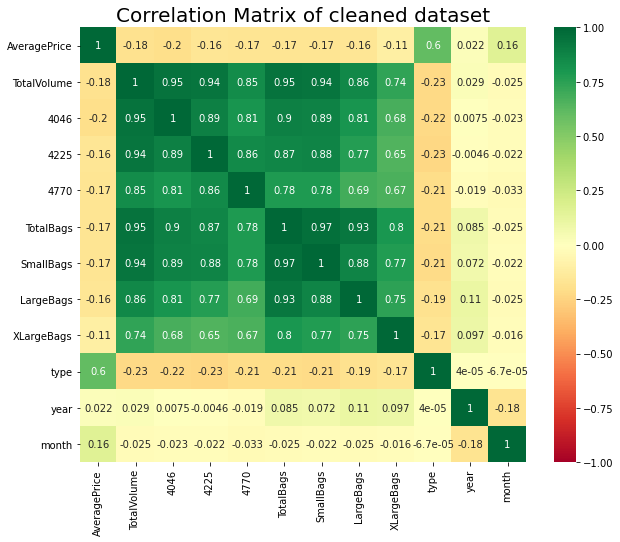

In [64]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.set_title("Correlation Matrix of cleaned dataset", fontsize=20)
sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)

#### Feature Selection

In [65]:
df_clean.round().describe()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,month
count,25161.000000,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,25161.000000,25161.00000,25161.000000,25161.000000
mean,1.364970,9.170913e+05,2.981530e+05,2.958284e+05,2.246363e+04,2.950432e+05,2.124199e+05,7.589923e+04,4405.649577,0.49994,2016.776877,6.107070
std,0.498467,3.660879e+06,1.265327e+06,1.187469e+06,1.027392e+05,1.210964e+06,8.530163e+05,3.517944e+05,25357.444331,0.50001,1.323978,3.362514
min,0.000000,8.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.00000,2015.000000,1.000000
25%,1.000000,1.400100e+04,9.220000e+02,3.284000e+03,0.000000e+00,7.734000e+03,5.245000e+03,2.890000e+02,0.000000,0.00000,2016.000000,3.000000
50%,1.000000,1.363320e+05,1.225800e+04,3.093700e+04,2.520000e+02,5.105000e+04,3.537300e+04,4.758000e+03,0.000000,0.00000,2017.000000,6.000000
75%,2.000000,5.638520e+05,1.358830e+05,1.921060e+05,8.009000e+03,1.632410e+05,1.159120e+05,3.744100e+04,594.000000,1.00000,2018.000000,9.000000
max,3.000000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,7.864297e+06,844930.000000,1.00000,2019.000000,12.000000


In [66]:
## see the dataset
df_clean.head(20)

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,0,2015,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,0,2015,1
2,2015-01-04,1.40,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,0,2015,1
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,0,2015,1
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,0,2015,1
5,2015-01-04,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.00,0,2015,1
6,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,0,2015,1
7,2015-01-04,1.19,166006.29,29419.03,47220.75,38568.95,50797.56,212419.88,75899.24,0.00,0,2015,1
8,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,0,2015,1
9,2015-01-04,0.88,228569.58,3274.30,168764.78,1447.06,295043.21,17525.31,37445.46,112.67,0,2015,1


In [67]:
## drop unused column such as Date because we already have year and month in separate column
df_clean = df_clean.drop('Date',1)

In [68]:
# TotalBags is a sum of SmallBags, LargeBags and XLargeBags, so we can drop these 3 columns
df_clean = df_clean.drop(['SmallBags','LargeBags','XLargeBags'],1)

In [69]:
# TotalVolume is a sum of 4046, 4225 and 4770, so we can drop these 3 columns
df_clean = df_clean.drop(['4046','4225','4770'],1)

In [73]:
df_clean.to_csv('df_clean.csv',sep=',')

#### Graphical Analysis

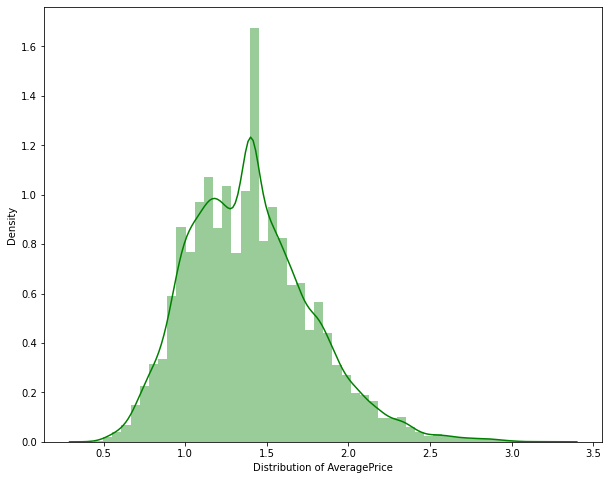

In [70]:
## Distribution of AveragePrice in cleaned dataset
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.distplot(df_clean["AveragePrice"],axlabel="Distribution of AveragePrice", color='green')

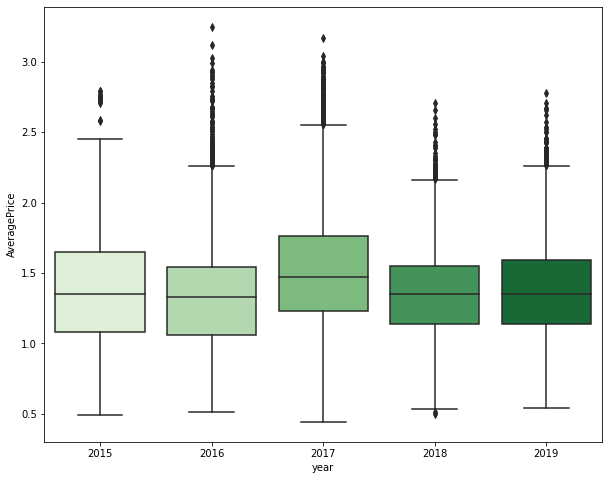

In [71]:
## AveragePrice of avocado each year
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.boxplot(x="year", y="AveragePrice", data=df_clean, palette='Greens')

plt.savefig('heatmap_missing_values.png', dpi=300, bbox_inches='tight')

#### **Conclusions**

* Not only class 'type' that affect the average price but also 'region'.
* AveragePrice for each region is different for every year.
* Based on 1st correlation matrix, 'TotalVolume' and 'TotalBags' show strongest correlation.
* 'type' shows more balanced data points as compared to 'region' and has simpler class. Hence, 'region' column is not needed unless we want to analyze the price according to region (but still more features related to region is needed).
* After label encoded 'type' column, it shows mild correlation with 'AveragePrice'. But it also show other variables correlates with each other which suggest a multicollinearity.
* Drop unnecessary columns such as Date, type of volumes sold, type of bags sold.


## Model Selection


##### Model 1
Based on 2 correlation matrices above, Model 1 is a Linear Regression model and only get important data / features that show strongest correlation.


In [138]:
## Select columns that will be used to create train and test dataset
model_1 = df_clean
model_1.head(10)

,AveragePrice,TotalVolume,TotalBags,type,year,month
0,1.22,40873.28,9716.46,0,2015,1
1,1.00,435021.49,46815.79,0,2015,1
2,1.40,788025.06,141136.68,0,2015,1
3,1.01,80034.32,7755.62,0,2015,1
4,1.02,491738.00,87663.13,0,2015,1
5,1.40,116253.44,57182.88,0,2015,1
6,0.93,5777334.90,528451.74,0,2015,1
7,1.19,166006.29,50797.56,0,2015,1
8,1.11,783068.03,77539.48,0,2015,1
9,0.88,228569.58,295043.21,0,2015,1


In [139]:
from sklearn.model_selection import train_test_split

X1=model_1[['AveragePrice','TotalVolume','TotalBags','type','year','month']] 
y1=model_1.type # independent var / predictor

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=1)

print("Shape of each Dataset : ")
print("X Train Shape = ",X1_train.shape)
print("Y Train Shape = ",y1_train.shape)
print("X Test Shape  = ",X1_test.shape)
print("Y Test Shape  = ",y1_test.shape)

Shape of each Dataset : 
X Train Shape =  (20128, 6)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 6)
Y Test Shape  =  (5033,)


In [140]:
## Standardization of dataset
from sklearn.preprocessing import StandardScaler

scaler_1 = StandardScaler().fit(model_1) # compute the mean and std to be used for later scaling.
model_1_std = scaler_1.transform(model_1) # perform standardization by centering and scaling
model_1 = pd.DataFrame(model_1_std) # convert from array to dataframe
model_1.columns = ['AveragePrice','TotalVolume','TotalBags','type','year','month'] # assign column names
model_1.head(10)

,AveragePrice,TotalVolume,TotalBags,type,year,month
0,-0.466633,-0.239351,-2.356242e-01,-0.999881,-1.342101,-1.518855
1,-1.049393,-0.131684,-2.049874e-01,-0.999881,-1.342101,-1.518855
2,0.010170,-0.035256,-1.270968e-01,-0.999881,-1.342101,-1.518855
3,-1.022904,-0.228654,-2.372435e-01,-0.999881,-1.342101,-1.518855
4,-0.996415,-0.116191,-1.712555e-01,-0.999881,-1.342101,-1.518855
5,0.010170,-0.218760,-1.964262e-01,-0.999881,-1.342101,-1.518855
6,-1.234816,1.327643,1.927499e-01,-0.999881,-1.342101,-1.518855
7,-0.546100,-0.205169,-2.016993e-01,-0.999881,-1.342101,-1.518855
8,-0.758013,-0.036610,-1.796156e-01,-0.999881,-1.342101,-1.518855
9,-1.367261,-0.188079,4.214195e-10,-0.999881,-1.342101,-1.518855


In [141]:
## create list using feature columns
model_1_features = ['TotalVolume','TotalBags','type','year']

# use above list to select subset of original dataframe
X1 = model_1[model_1_features]
y1 = model_1.AveragePrice # dependent variable / output

X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.20, random_state=1) 

print("Shape of each New Dataset : ")
print("X Train Shape = ",X1_train.shape)
print("Y Train Shape = ",y1_train.shape)
print("X Test Shape  = ",X1_test.shape)
print("Y Test Shape  = ",y1_test.shape)

Shape of each New Dataset : 
X Train Shape =  (20128, 4)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 4)
Y Test Shape  =  (5033,)


In [142]:
from sklearn.linear_model import LinearRegression

LR1 = LinearRegression()
LR1.fit(X1_train, y1_train) 

model_1_features.insert(0,'Intercept')
coef = LR1.coef_.tolist()
coef.insert(0, LR1.intercept_)
eq1 = zip(model_1_features, coef)

for model_1_features,coef in eq1:
    print(model_1_features," = " ,coef)

y1_pred_train = LR1.predict(X1_train)
y1_pred_test = LR1.predict(X1_test)

Intercept  =  -0.00015901086120534208
TotalVolume  =  -0.061280822012400975
TotalBags  =  0.012597645950422634
type  =  0.5960340779218676
year  =  0.0188459832469099


##### Model 2
Similar Linear Regression model with Model 1 but adding more features to test on accuracy score.

In [86]:
df_price.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,0,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1,1
2,2015-01-04,1.40,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,2015,2,1
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,3,1
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,4,1


i use df_price dataset because i want to test for all features, how will LR perform.

In [131]:
## Select columns that will be used to create train and test dataset
model_2 = df_price.drop('Date',1)
model_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  25161 non-null  float64
 1   TotalVolume   25161 non-null  float64
 2   4046          25161 non-null  float64
 3   4225          25161 non-null  float64
 4   4770          25161 non-null  float64
 5   TotalBags     25161 non-null  float64
 6   SmallBags     25161 non-null  float64
 7   LargeBags     25161 non-null  float64
 8   XLargeBags    25161 non-null  float64
 9   type          25161 non-null  int64  
 10  year          25161 non-null  int64  
 11  region        25161 non-null  int64  
 12  month         25161 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 2.5 MB


In [132]:
from sklearn.model_selection import train_test_split

X2=model_2[['AveragePrice','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region','month']]
y2=model_2.type # independent var / predictor

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)

print("Shape of each Dataset : ")
print("X Train Shape = ",X2_train.shape)
print("Y Train Shape = ",y2_train.shape)
print("X Test Shape  = ",X2_test.shape)
print("Y Test Shape  = ",y2_test.shape)

Shape of each Dataset : 
X Train Shape =  (20128, 13)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 13)
Y Test Shape  =  (5033,)


In [135]:
## Standardization of dataset
from sklearn.preprocessing import StandardScaler

scaler_2 = StandardScaler().fit(model_2) # compute the mean and std to be used for later scaling.
model_2_std = scaler_2.transform(model_2) # perform standardization by centering and scaling
model_2 = pd.DataFrame(model_2_std) # convert from array to dataframe
model_2.columns = ['AveragePrice','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region','month'] # assign column names
model_2.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
0,-0.466633,-0.239351,-0.233410,-0.225308,-0.218166,-2.356242e-01,-2.382569e-01,-2.142479e-01,-0.173745,-0.999881,-1.342101,-1.700256,-1.518855
1,-1.049393,-0.131684,0.052280,-0.229069,-0.217852,-2.049874e-01,-2.294407e-01,-1.301656e-01,-0.173745,-0.999881,-1.342101,-1.636088,-1.518855
2,0.010170,-0.035256,-0.192970,0.216496,0.170643,-1.270968e-01,-8.824604e-02,-2.044094e-01,-0.173745,-0.999881,-1.342101,-1.571920,-1.518855
3,-1.022904,-0.228654,-0.200419,-0.228107,-0.191861,-2.372435e-01,-2.419176e-01,-2.109454e-01,-0.173745,-0.999881,-1.342101,-1.507752,-1.518855
4,-0.996415,-0.116191,-0.229952,0.084992,-0.217398,-1.712555e-01,-1.465570e-01,-2.150246e-01,-0.173745,-0.999881,-1.342101,-1.443583,-1.518855
5,0.010170,-0.218760,-0.233055,-0.202229,-0.217585,-1.964262e-01,-1.819896e-01,-2.157532e-01,-0.173745,-0.999881,-1.342101,-1.379415,-1.518855
6,-1.234816,1.327643,2.011770,1.660646,1.119517,1.927499e-01,3.104029e-01,-7.964094e-02,-0.040614,-0.999881,-1.342101,-1.315247,-1.518855
7,-0.546100,-0.205169,-0.212387,-0.209363,0.156762,-2.016993e-01,-5.440699e-09,5.503133e-09,-0.173745,-0.999881,-1.342101,-1.251078,-1.518855
8,-0.758013,-0.036610,-0.211715,0.214682,0.993238,-1.796156e-01,-1.635774e-01,-2.025321e-01,-0.173745,-0.999881,-1.342101,-1.186910,-1.518855
9,-1.367261,-0.188079,-0.233050,-0.107006,-0.204566,4.214195e-10,-2.284815e-01,-1.093097e-01,-0.169302,-0.999881,-1.342101,-1.122742,-1.518855


In [99]:
## create list using feature columns
model_2_features = ['TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region','month']

# use above list to select subset of original dataframe
X2 = model_2[model_2_features]
y2 = model_2.AveragePrice # dependent variable / output

X2_train, X2_test, y2_train, y2_test=train_test_split(X2, y2, test_size=0.20, random_state=1) 

print("Shape of each New Dataset : ")
print("X Train Shape = ",X2_train.shape)
print("Y Train Shape = ",y2_train.shape)
print("X Test Shape  = ",X2_test.shape)
print("Y Test Shape  = ",y2_test.shape)

Shape of each New Dataset : 
X Train Shape =  (20128, 12)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 12)
Y Test Shape  =  (5033,)


In [100]:
from sklearn.linear_model import LinearRegression

LR2 = LinearRegression()
LR2.fit(X2_train, y2_train) 

model_2_features.insert(0,'Intercept')
coef = LR2.coef_.tolist()
coef.insert(0, LR2.intercept_)
eq2 = zip(model_2_features, coef)

for model_2_features,coef in eq1:
    print(model_2_features," = " ,coef)

y2_pred_train = LR2.predict(X2_train)
y2_pred_test = LR2.predict(X2_test)

#### Model 3
Random Forest

In [136]:
## Select columns that will be used to create train and test dataset
model_3 = df_clean
model_3.head()

,AveragePrice,TotalVolume,TotalBags,type,year,month
0,1.22,40873.28,9716.46,0,2015,1
1,1.00,435021.49,46815.79,0,2015,1
2,1.40,788025.06,141136.68,0,2015,1
3,1.01,80034.32,7755.62,0,2015,1
4,1.02,491738.00,87663.13,0,2015,1


In [143]:
from sklearn.model_selection import train_test_split

X3=model_3[['AveragePrice','TotalVolume','TotalBags','type','year','month']] 
y3=model_3.type # independent var / predictor

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=1)

print("Shape of each Dataset : ")
print("X Train Shape = ",X3_train.shape)
print("Y Train Shape = ",y3_train.shape)
print("X Test Shape  = ",X3_test.shape)
print("Y Test Shape  = ",y3_test.shape)

Shape of each Dataset : 
X Train Shape =  (20128, 6)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 6)
Y Test Shape  =  (5033,)


In [144]:
## Standardization of dataset
from sklearn.preprocessing import StandardScaler

scaler_3 = StandardScaler().fit(model_3) # compute the mean and std to be used for later scaling.
model_3_std = scaler_3.transform(model_3) # perform standardization by centering and scaling
model_3 = pd.DataFrame(model_3_std) # convert from array to dataframe
model_3.columns = ['AveragePrice','TotalVolume','TotalBags','type','year','month'] # assign column names
model_3.head(10)

,AveragePrice,TotalVolume,TotalBags,type,year,month
0,-0.466633,-0.239351,-2.356242e-01,-0.999881,-1.342101,-1.518855
1,-1.049393,-0.131684,-2.049874e-01,-0.999881,-1.342101,-1.518855
2,0.010170,-0.035256,-1.270968e-01,-0.999881,-1.342101,-1.518855
3,-1.022904,-0.228654,-2.372435e-01,-0.999881,-1.342101,-1.518855
4,-0.996415,-0.116191,-1.712555e-01,-0.999881,-1.342101,-1.518855
5,0.010170,-0.218760,-1.964262e-01,-0.999881,-1.342101,-1.518855
6,-1.234816,1.327643,1.927499e-01,-0.999881,-1.342101,-1.518855
7,-0.546100,-0.205169,-2.016993e-01,-0.999881,-1.342101,-1.518855
8,-0.758013,-0.036610,-1.796156e-01,-0.999881,-1.342101,-1.518855
9,-1.367261,-0.188079,4.214195e-10,-0.999881,-1.342101,-1.518855


In [145]:
## create list using feature columns
model_3_features = ['TotalVolume','TotalBags','type','year','month']

# use above list to select subset of original dataframe
X3 = model_3[model_3_features]
y3 = model_3.AveragePrice # dependent variable / output

X3_train, X3_test, y3_train, y3_test=train_test_split(X3, y3, test_size=0.20, random_state=1) 

print("Shape of each New Dataset : ")
print("X Train Shape = ",X3_train.shape)
print("Y Train Shape = ",y3_train.shape)
print("X Test Shape  = ",X3_test.shape)
print("Y Test Shape  = ",y3_test.shape)

Shape of each New Dataset : 
X Train Shape =  (20128, 5)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 5)
Y Test Shape  =  (5033,)


In [146]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X3_train, y3_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [147]:
y3_pred_train = RF.predict(X3_train)
y3_pred_test = RF.predict(X3_test)

## Evaluation Methods


In [80]:
from sklearn import metrics

#### Model 1

**Root Mean Square Error (RMSE)**

In [81]:
print("Model Evaluation for Linear Regression Model 1 using RMSE")
print("")
RMSE_train_1 = np.sqrt( metrics.mean_squared_error(y1_train, y1_pred_train))
RMSE_test_1 = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_test))
print('RMSE for training set = {}'.format(round(RMSE_train_1,2)))
print('RMSE for test set = {}'.format(round(RMSE_test_1,2)))

Model Evaluation for Linear Regression Model 1 using RMSE

RMSE for training set = 0.8
RMSE for test set = 0.79


**R-square (R2)**

In [82]:
print("Model 1 - R2 score for TRAINING dataset")
print("")

yhat_1 = LR1.predict(X1_train)
SS_Residual_1 = sum((y1_train-yhat_1)**2)
SS_Total_1 = sum((y1_train-np.mean(y1_train))**2)
r_squared_1 = 1 - (float(SS_Residual_1))/SS_Total_1
print("R2 score          = ",round(r_squared_1,5))

Model 1 - R2 score for TRAINING dataset

R2 score          =  0.36927


In [83]:
print("Model 1 - R2 score for TEST dataset")
print("")

yhat_1 = LR1.predict(X1_test)
SS_Residual_1 = sum((y1_test-yhat_1)**2)
SS_Total_1 = sum((y1_test-np.mean(y1_test))**2)
r_squared_1 = 1 - (float(SS_Residual_1))/SS_Total_1
print("R2 score          = ",round(r_squared_1,5))

Model 1 - R2 score for TEST dataset

R2 score          =  0.3641


**Accuracy**

In [84]:
## acuracy score
train_score_1 = LR1.score(X1_train, y1_train)
test_score_1 = LR1.score(X1_test, y1_test)

print("Model 1 accuracy score: ")
print("")
print("Train Score = ",round(train_score_1*100,0),"%")
print("Test Score  = ",round(test_score_1*100,0), "%")

Model 1 accuracy score: 

Train Score =  37.0 %
Test Score  =  36.0 %


#### Model 2

**Root Mean Square Error (RMSE)**

In [101]:
print("Model Evaluation for Linear Regression Model 2 using RMSE")
print("")
RMSE_train_2 = np.sqrt( metrics.mean_squared_error(y2_train, y2_pred_train))
RMSE_test_2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_test))
print('RMSE for training set = {}'.format(round(RMSE_train_2,2)))
print('RMSE for test set = {}'.format(round(RMSE_test_2,2)))

Model Evaluation for Linear Regression Model 2 using RMSE

RMSE for training set = 0.29
RMSE for test set = 0.29


**R-square (R2)**

In [102]:
print("Model 2 -  R2 score for TRAINING dataset")
print("")

yhat_2 = LR2.predict(X2_train)
SS_Residual_2 = sum((y2_train-yhat_2)**2)
SS_Total_2 = sum((y2_train-np.mean(y2_train))**2)
r_squared_2 = 1 - (float(SS_Residual_2))/SS_Total_2
print("R2 score          = ",round(r_squared_2,5))

Model 2 -  R2 score for TRAINING dataset

R2 score          =  0.40669


In [103]:
print("Model 2 - R2 score for TEST dataset")
print("")

yhat_2 = LR2.predict(X2_test)
SS_Residual_2 = sum((y2_test-yhat_2)**2)
SS_Total_2 = sum((y2_test-np.mean(y2_test))**2)
r_squared_2 = 1 - (float(SS_Residual_2))/SS_Total_2
print("R2 score          = ",round(r_squared_2,5))

Model 2 - R2 score for TEST dataset

R2 score          =  0.40105


**Accuracy**

In [104]:
## acuracy score
train_score_2 = LR2.score(X2_train, y2_train)
test_score_2 = LR2.score(X2_test, y2_test)

print("Model 2 accuracy score: ")
print("")
print("Train Score = ",round(train_score_2*100,0),"%")
print("Test Score  = ",round(test_score_2*100,0), "%")

Model 2 accuracy score: 

Train Score =  41.0 %
Test Score  =  40.0 %


#### Model 3

**Root Mean Square Error (RMSE)**

In [148]:
print("Model Evaluation for Random Forest Model 3 using RMSE")

RMSE_train_3 = np.sqrt( metrics.mean_squared_error(y3_train, y3_pred_train))
RMSE_test_3 = np.sqrt(metrics.mean_squared_error(y3_test, y3_pred_test))
print('RMSE for training set is {}'.format(round(RMSE_train_3,2)))
print('RMSE for test set is {}'.format(round(RMSE_test_3,2)))

Model Evaluation for Random Forest Model 3 using RMSE
RMSE for training set is 0.22
RMSE for test set is 0.58


**R-square (R2)**

In [149]:
print("Model 3 -  R2 score for TRAINING dataset")
print("")

yhat_3 = RF.predict(X3_train)
SS_Residual_3 = sum((y3_train-yhat_3)**2)
SS_Total_3 = sum((y3_train-np.mean(y3_train))**2)
r_squared_3 = 1 - (float(SS_Residual_3))/SS_Total_3
print("R2 score          = ",round(r_squared_3,5))

Model 3 -  R2 score for TRAINING dataset

R2 score          =  0.95251


In [150]:
print("Model 3 - R2 score for TEST dataset")
print("")

yhat_3 = RF.predict(X3_test)
SS_Residual_3 = sum((y3_test-yhat_3)**2)
SS_Total_3 = sum((y3_test-np.mean(y3_test))**2)
r_squared_3 = 1 - (float(SS_Residual_3))/SS_Total_3
print("R2 score          = ",round(r_squared_3,5))

Model 3 - R2 score for TEST dataset

R2 score          =  0.65999


**Accuracy**

In [151]:
## acuracy score
train_score_3 = RF.score(X3_train, y3_train)
test_score_3 = RF.score(X3_test, y3_test)

print("Model 2 accuracy score: ")
print("")
print("Train Score = ",round(train_score_3*100,0),"%")
print("Test Score  = ",round(test_score_3*100,0), "%")

Model 2 accuracy score: 

Train Score =  95.0 %
Test Score  =  66.0 %


#### Conclusions
* Model 1 give quite low accuracy value = approx 36%-37% for training and test.
* Model 2 shows minor improvement in accuracy value = approx 38% for both training and test.
* The accuracy has increased after incorporate all columns for training in Model 2.
* Model 3 shows the best accuracy among all 3 models = approx 97% for training and 77% for test.
* Model 3 can be used to predict the prices of avocados and the number of avocados sold.

## Validation

In [105]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

##### Model 2

In [123]:
X2_trainval, X2_testval, y2_trainval, y2_testval = train_test_split(X2_train,y2_train, test_size=0.20)
print('Shape of training dataset = ', X2_trainval.shape, y2_trainval.shape)
print('Shape of test dataset = ', X2_testval.shape, y2_testval.shape)

Shape of training dataset =  (16102, 12) (16102,)
Shape of test dataset =  (4026, 12) (4026,)


In [127]:
kf = KFold(n_splits=8) # Define the split - into 5 folds 
kf.get_n_splits(X2) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=8, random_state=None, shuffle=False)


Text(0, 0.5, 'Predictions')

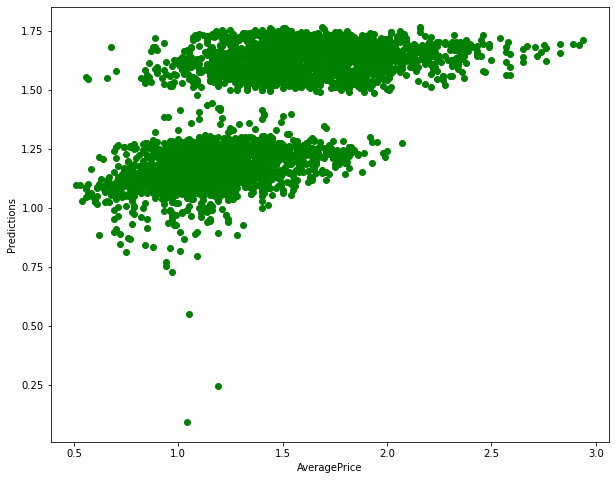

In [128]:
model_2 = LR2.fit(X2_trainval, y2_trainval)
predictions_2 = LR2.predict(X2_testval)
predictions_2

## Prediction model 2 plot
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
plt.scatter(y2_testval, predictions_2,c='g')
plt.xlabel('AveragePrice')
plt.ylabel('Predictions')

In [129]:
## Check for accuracy
print ('Accuracy score of Linear Regression model = ', round(model_2.score(X2_testval, y2_testval),2)*100,"%")

Accuracy score of Linear Regression model =  40.0 %


##### Model 3

In [152]:
X3_trainval, X3_testval, y3_trainval, y3_testval = train_test_split(X3_train,y3_train, test_size=0.20)
print('Shape of training dataset = ', X3_trainval.shape, y3_trainval.shape)
print('Shape of test dataset = ', X3_testval.shape, y3_trainval.shape)

Shape of training dataset =  (16102, 5) (16102,)
Shape of test dataset =  (4026, 5) (16102,)


In [159]:
kf = KFold(n_splits=10) # Define the split
kf.get_n_splits(X3) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


Text(0, 0.5, 'Predictions')

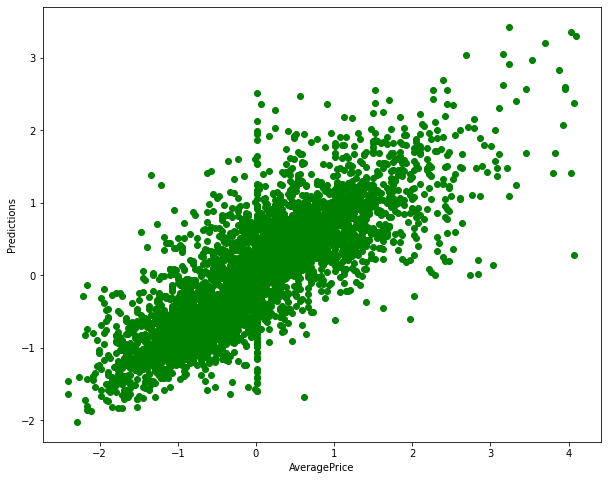

In [160]:
model_3 = RF.fit(X3_trainval, y3_trainval)
predictions_3 = RF.predict(X3_testval)
predictions_3

## Prediction model 2 plot
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
plt.scatter(y3_testval, predictions_3,c='g')
plt.xlabel('AveragePrice')
plt.ylabel('Predictions')

In [162]:
## Check for accuracy
print ('Accuracy score of Random Forest model = ', round(model_3.score(X3_testval, y3_testval),2)*100,"%")

Accuracy score of Random Forest model =  65.0 %


##### Conclusion
* Model 2 shows minor improvement in accuracy after done k-fold cross validation (k=2)
* Model 3 shows weaker performances after done k-fold cross validation. Hence, proceed with Model 3 but without cross validation.

## Prediction: AveragePrice of avocado

In [176]:
X=df_clean.drop('AveragePrice',1)
y=df_clean['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [177]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
pred=RF.predict(X_test)

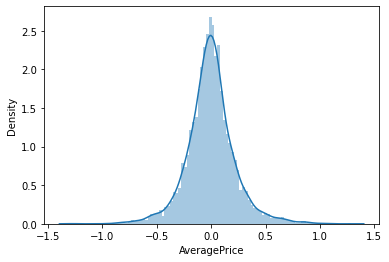

In [178]:
sns.distplot((y_test-pred),bins=100)

,AveragePrice,Predicted AveragePrice
22511,1.16,1.2302
5211,0.94,1.1209
3073,1.38,1.0734
6234,1.52,1.4485
6491,0.74,0.7759
7346,0.65,1.0889
15874,1.28,1.4337
3050,0.98,1.0379
312,1.27,1.4706
7691,0.88,0.8759


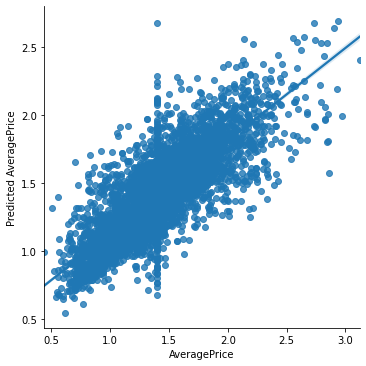

In [180]:
data = pd.DataFrame({'AveragePrice':y_test , 'Predicted AveragePrice':pred},columns=['AveragePrice','Predicted AveragePrice'])
sns.lmplot(x='AveragePrice',y='Predicted AveragePrice',data=data,palette='Greens')
data.head(20)

there is not much different with actual and predicted price. next, lets try to predict price for 1 year.

In [184]:
# create subset from original dataframe for type conventional only.
type_conv = 0
filter = df_clean['type'] != type_conv
conv_2020 = df_clean.drop(df_clean[filter].index, inplace=False)
conv_2020.head()

,AveragePrice,TotalVolume,TotalBags,type,year,month
0,1.22,40873.28,9716.46,0,2015,1
1,1.00,435021.49,46815.79,0,2015,1
2,1.40,788025.06,141136.68,0,2015,1
3,1.01,80034.32,7755.62,0,2015,1
4,1.02,491738.00,87663.13,0,2015,1


Model Prediction for conventional avocado in 2020 is = 
$ 1.24



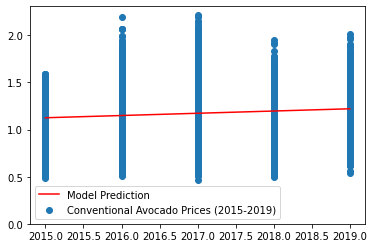

In [186]:
#from scipy import stats
X = conv_2020.year
y = conv_2020['AveragePrice']
slope, intercept, r, p, std_err = stats.linregress(X, y)

def modelPrediction(x):
  return slope * x + intercept

label = 'Model Prediction for conventional avocado in 2020 is = '

model = list(map(modelPrediction, X)) # scipy

x_pred = 2020
y_pred = modelPrediction(x_pred)
print(label)

ap_conv_2020 = round(y_pred, 2)
print('$ {}'.format(ap_conv_2020))
print("")

plt.scatter(X, y) # Scatter Plot
plt.plot(X, model, color='red')
plt.ylim(ymin=0) # starts at zero
plt.legend(['Model Prediction', 'Conventional Avocado Prices (2015-2019)'])
plt.show()

## Conclusion

*   2 machine learning model are compared and Random Forest is best fit for our predictions.
* Random forest model predict average price of avocado better than linear model.
*   Predicted average price increase as the actual average price increase.
*   Predicted volume of avocado sold also increase when actual volumes of avocado sold increase.
*   More features to be introduced: weather, region population, market_variety,